In [273]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Update to include make and model
cols = ["year", "make", "odometer", "sellingprice"]
df = pd.read_csv('data/car_prices.csv', usecols=cols).replace({'-': np.nan, '': np.nan}).dropna()
df['make'] = df['make'].str.lower()

# Filter to only desired makes and models
makes = sorted(['chevrolet', 'ford', 'honda', 'hyundai', 'toyota', 'volkswagen', 'porsche', 'bmw', 'audi', 'mazda'])
df = df[df['make'].isin(makes)]

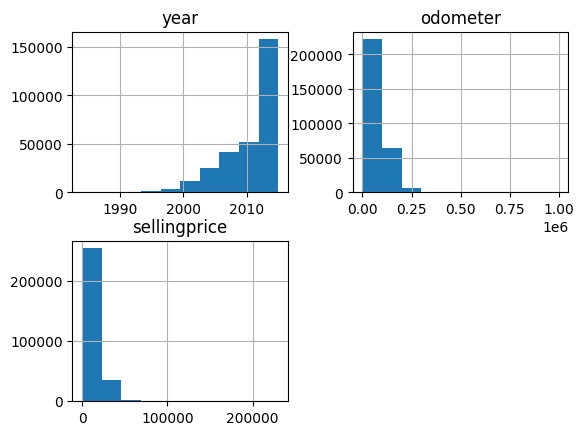

In [274]:
# Generate data distribution histograms
df.hist()
pyplot.show()

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='odometer', ylabel='year'>,
        <Axes: xlabel='sellingprice', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='odometer'>,
        <Axes: xlabel='odometer', ylabel='odometer'>,
        <Axes: xlabel='sellingprice', ylabel='odometer'>],
       [<Axes: xlabel='year', ylabel='sellingprice'>,
        <Axes: xlabel='odometer', ylabel='sellingprice'>,
        <Axes: xlabel='sellingprice', ylabel='sellingprice'>]],
      dtype=object)

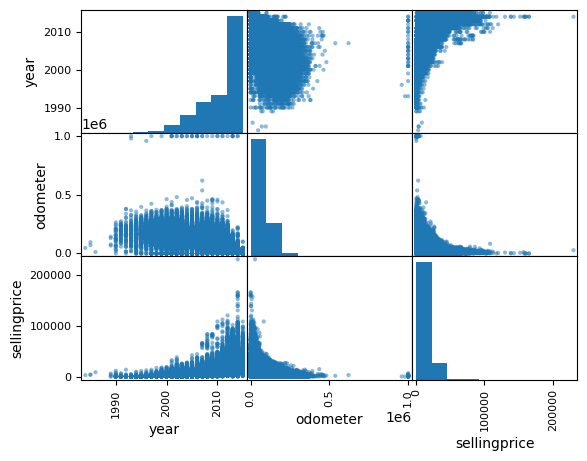

In [275]:
# Generate a scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)

In [276]:
from sklearn.model_selection import train_test_split

# Choose variables
# Independent variables:
x = pd.get_dummies(df.drop(columns=['sellingprice']), columns=['make'], prefix=['make'])

# Dependent variables
y = df[['sellingprice']].copy()

# Split the model into training and testing sets
# Vectorize makes and models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

from sklearn.linear_model import LinearRegression

# Train a model on the split dataset
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [277]:
def estimate(make: str, year: int, odometer: int):
    input_df = pd.DataFrame([[year, odometer]], columns=['year', 'odometer'])

    # Generate dummies with all categories
    for make in makes:
        col = f'make_{make}'
        if col not in input_df.columns:
            input_df[col] = False

    # Set the individual make value to true
    input_df[f'make_{make}'] = True

    return model.predict(input_df)

print(estimate('honda', 2020, 45000))

[[20257.87335542]]


In [278]:
# Now that we have a working model, we can analyze its accuracy using the testing set
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

np.float64(44253493.11463332)